In [29]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from math import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [30]:
# Parse CSV
data = np.genfromtxt('./diabetes.csv', delimiter=',')
data = np.delete(data, 0, axis=0)
labels = data[:, -1]
data = np.delete(data, -1, axis=1)

print(np.shape(data))
print(np.shape(labels))

print("Sample data: {}".format(data[:3]))
print("Sample labels: {}".format(labels[:3]))

(768, 8)
(768,)
Sample data: [[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
Sample labels: [1. 0. 1.]


In [31]:
# Preprocess Data
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

encoder = OneHotEncoder(sparse=False)

x_train, x_test, y_train, y_test = train_test_split(data_norm, labels, test_size=0.2)
y_train_enc = encoder.fit_transform(y_train.reshape(-1,1))
y_test_enc = encoder.fit_transform(y_test.reshape(-1,1))
class_names = ['No Diabetes', 'Has Diabetes']

print("Sample train data: {}".format(x_train))
print("Sample train labels: {}".format(y_train_enc))

Sample train data: [[0.11764706 0.49748744 0.49180328 ... 0.54545455 0.16011956 0.        ]
 [0.         0.47738693 0.6557377  ... 0.54396423 0.10760034 0.08333333]
 [0.47058824 0.47738693 0.59016393 ... 0.54843517 0.17378309 0.6       ]
 ...
 [0.05882353 0.40703518 0.59016393 ... 0.39642325 0.08753202 0.05      ]
 [0.29411765 0.65326633 0.67213115 ... 0.58271237 0.37489325 0.26666667]
 [0.29411765 0.77889447 0.68852459 ... 0.57675112 0.23099915 0.21666667]]
Sample train labels: [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


Epoch 00427: early stopping
Final test set loss: 0.479191
Final test set accuracy: 0.785714
              precision    recall  f1-score   support

 No Diabetes       0.81      0.91      0.85       107
Has Diabetes       0.71      0.51      0.59        47

    accuracy                           0.79       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.78      0.79      0.77       154



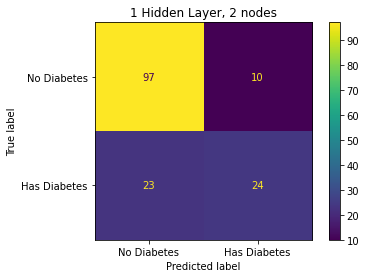

In [32]:
mlp = keras.models.Sequential()

mlp.add(Dense(2, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]

mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 2 nodes")
plt.show()

Final test set loss: 0.474923
Final test set accuracy: 0.798701
              precision    recall  f1-score   support

 No Diabetes       0.82      0.91      0.86       107
Has Diabetes       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



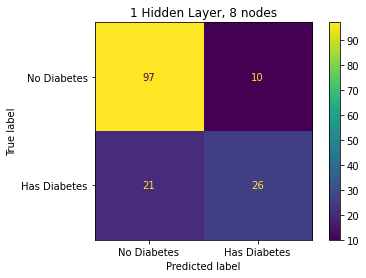

In [33]:
mlp = keras.models.Sequential()

mlp.add(Dense(8, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 8 nodes")
plt.show()

Epoch 00227: early stopping
Final test set loss: 0.479201
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

 No Diabetes       0.82      0.88      0.85       107
Has Diabetes       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



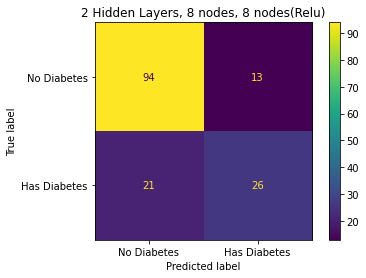

In [34]:
mlp = keras.models.Sequential()

mlp.add(Dense(8, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(8, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 8 nodes, 8 nodes(Relu)")
plt.show()

Epoch 00437: early stopping
Final test set loss: 0.471454
Final test set accuracy: 0.785714
              precision    recall  f1-score   support

 No Diabetes       0.80      0.92      0.86       107
Has Diabetes       0.72      0.49      0.58        47

    accuracy                           0.79       154
   macro avg       0.76      0.70      0.72       154
weighted avg       0.78      0.79      0.77       154



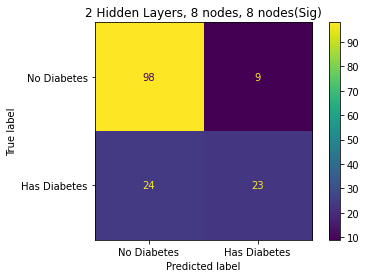

In [35]:
mlp = keras.models.Sequential()

mlp.add(Dense(8, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(8, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 8 nodes, 8 nodes(Sig)")
plt.show()

Epoch 00167: early stopping
Final test set loss: 0.494135
Final test set accuracy: 0.798701
              precision    recall  f1-score   support

 No Diabetes       0.84      0.88      0.86       107
Has Diabetes       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



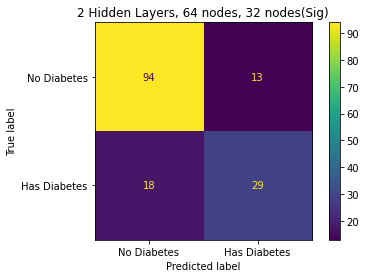

In [36]:
mlp = keras.models.Sequential()

mlp.add(Dense(64, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 64 nodes, 32 nodes(Sig)")
plt.show()

Epoch 00150: early stopping
Final test set loss: 0.478518
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

 No Diabetes       0.82      0.88      0.85       107
Has Diabetes       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



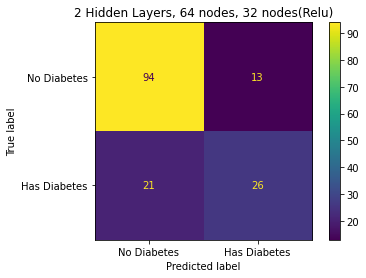

In [57]:
mlp = keras.models.Sequential()

mlp.add(Dense(64, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 64 nodes, 32 nodes(Relu)")
plt.show()

Epoch 00130: early stopping
Final test set loss: 0.479423
Final test set accuracy: 0.785714
              precision    recall  f1-score   support

 No Diabetes       0.82      0.88      0.85       107
Has Diabetes       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



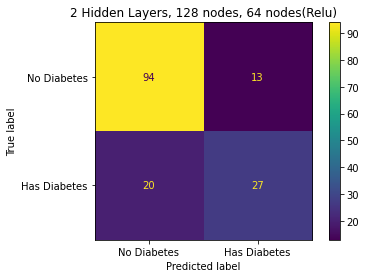

In [56]:
mlp = keras.models.Sequential()

mlp.add(Dense(128, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(64, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 128 nodes, 64 nodes(Relu)")
plt.show()

Epoch 00161: early stopping
Final test set loss: 0.495087
Final test set accuracy: 0.792208
              precision    recall  f1-score   support

 No Diabetes       0.83      0.88      0.85       107
Has Diabetes       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



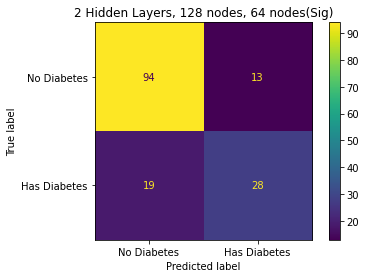

In [54]:
mlp = keras.models.Sequential()

mlp.add(Dense(128, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(64, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 128 nodes, 64 nodes(Sig)")
plt.show()

Epoch 00170: early stopping
Final test set loss: 0.487334
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

 No Diabetes       0.82      0.88      0.85       107
Has Diabetes       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



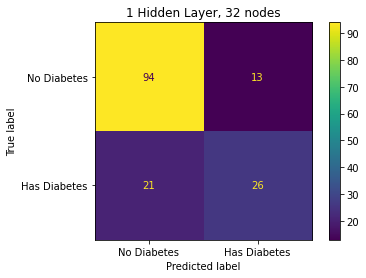

In [40]:
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 32 nodes")
plt.show()

Epoch 00151: early stopping
Final test set loss: 0.493570
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

 No Diabetes       0.79      0.93      0.85       107
Has Diabetes       0.72      0.45      0.55        47

    accuracy                           0.78       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.77      0.78      0.76       154



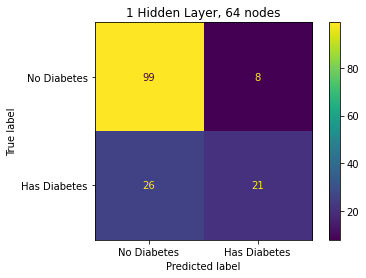

In [41]:
mlp = keras.models.Sequential()

mlp.add(Dense(64, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 64 nodes")
plt.show()

Epoch 00116: early stopping
Final test set loss: 0.491081
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

 No Diabetes       0.81      0.90      0.85       107
Has Diabetes       0.69      0.51      0.59        47

    accuracy                           0.78       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.77      0.78      0.77       154



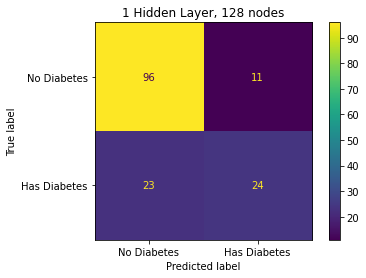

In [42]:
mlp = keras.models.Sequential()

mlp.add(Dense(128, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 128 nodes")
plt.show()

Epoch 00152: early stopping
Final test set loss: 0.488588
Final test set accuracy: 0.792208
              precision    recall  f1-score   support

 No Diabetes       0.83      0.88      0.85       107
Has Diabetes       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



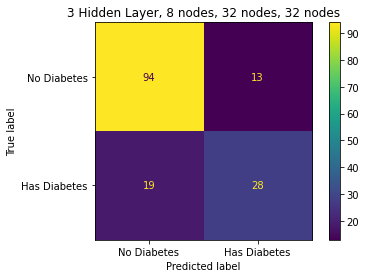

In [43]:
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='sigmoid', name='hidden1'))
mlp.add(Dense(32, activation='sigmoid', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layer, 8 nodes, 32 nodes, 32 nodes")
plt.show()

Epoch 00107: early stopping
Final test set loss: 0.475157
Final test set accuracy: 0.785714
              precision    recall  f1-score   support

 No Diabetes       0.81      0.91      0.85       107
Has Diabetes       0.71      0.51      0.59        47

    accuracy                           0.79       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.78      0.79      0.77       154



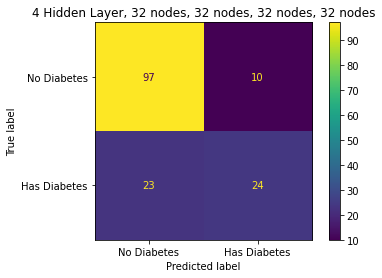

In [44]:
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='sigmoid', name='hidden1'))
mlp.add(Dense(32, activation='sigmoid', name='hidden2'))
mlp.add(Dense(32, activation='sigmoid', name='hidden3'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("4 Hidden Layer, 32 nodes, 32 nodes, 32 nodes, 32 nodes")
plt.show()

Epoch 00195: early stopping
Final test set loss: 0.479978
Final test set accuracy: 0.772727
              precision    recall  f1-score   support

 No Diabetes       0.79      0.93      0.85       107
Has Diabetes       0.71      0.43      0.53        47

    accuracy                           0.77       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.76      0.77      0.75       154



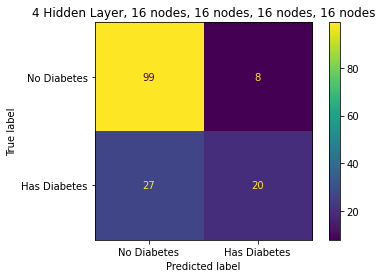

In [45]:
mlp = keras.models.Sequential()

mlp.add(Dense(16, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(16, activation='sigmoid', name='hidden1'))
mlp.add(Dense(16, activation='sigmoid', name='hidden2'))
mlp.add(Dense(16, activation='sigmoid', name='hidden3'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("4 Hidden Layer, 16 nodes, 16 nodes, 16 nodes, 16 nodes")
plt.show()

Epoch 00196: early stopping
Final test set loss: 0.487540
Final test set accuracy: 0.785714
              precision    recall  f1-score   support

 No Diabetes       0.82      0.89      0.85       107
Has Diabetes       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



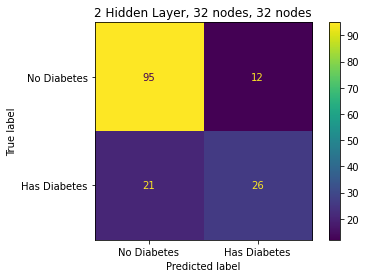

In [46]:
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layer, 32 nodes, 32 nodes")
plt.show()

Epoch 00189: early stopping
Final test set loss: 0.483541
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

 No Diabetes       0.80      0.92      0.85       107
Has Diabetes       0.71      0.47      0.56        47

    accuracy                           0.78       154
   macro avg       0.75      0.69      0.71       154
weighted avg       0.77      0.78      0.76       154



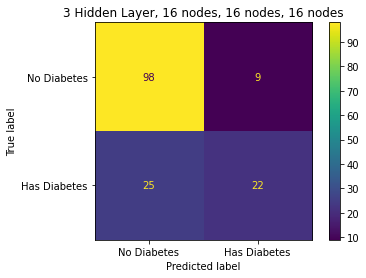

In [47]:
mlp = keras.models.Sequential()

mlp.add(Dense(16, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(16, activation='sigmoid', name='hidden1'))
mlp.add(Dense(16, activation='sigmoid', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layer, 16 nodes, 16 nodes, 16 nodes")
plt.show()

Epoch 00132: early stopping
Final test set loss: 0.476626
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

 No Diabetes       0.79      0.93      0.85       107
Has Diabetes       0.72      0.45      0.55        47

    accuracy                           0.78       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.77      0.78      0.76       154



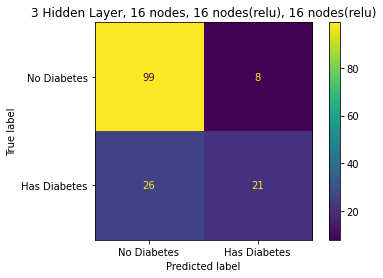

In [48]:
mlp = keras.models.Sequential()

mlp.add(Dense(16, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(16, activation='relu', name='hidden1'))
mlp.add(Dense(16, activation='relu', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layer, 16 nodes, 16 nodes(relu), 16 nodes(relu)")
plt.show()

Final test set loss: 0.470011
Final test set accuracy: 0.798701
              precision    recall  f1-score   support

 No Diabetes       0.82      0.91      0.86       107
Has Diabetes       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



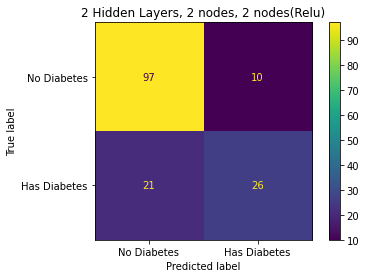

In [49]:
mlp = keras.models.Sequential()

mlp.add(Dense(2, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 2 nodes, 2 nodes(Relu)")
plt.show()

Final test set loss: 0.457228
Final test set accuracy: 0.792208
              precision    recall  f1-score   support

 No Diabetes       0.82      0.90      0.86       107
Has Diabetes       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



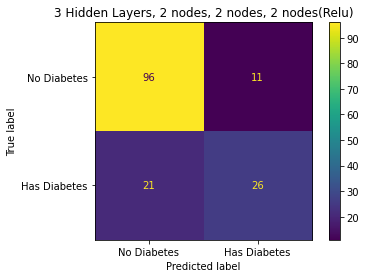

In [50]:
mlp = keras.models.Sequential()

mlp.add(Dense(2, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='relu', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layers, 2 nodes, 2 nodes, 2 nodes(Relu)")
plt.show()

Epoch 00126: early stopping
Final test set loss: 0.516689
Final test set accuracy: 0.759740
              precision    recall  f1-score   support

 No Diabetes       0.76      0.95      0.85       107
Has Diabetes       0.75      0.32      0.45        47

    accuracy                           0.76       154
   macro avg       0.76      0.64      0.65       154
weighted avg       0.76      0.76      0.72       154



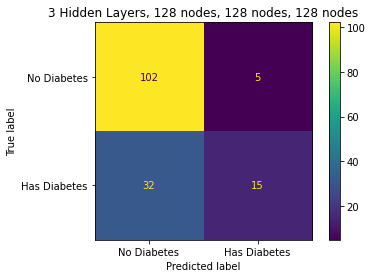

In [51]:
mlp = keras.models.Sequential()

mlp.add(Dense(128, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(128, activation='sigmoid', name='hidden1'))
mlp.add(Dense(128, activation='sigmoid', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layers, 128 nodes, 128 nodes, 128 nodes")
plt.show()